#### Praxisprojekt: 
## Auto-Datensatz mit Linearer Regression auswerten

In [78]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#script_dir = os.path.dirname(os.path.abspath(__file__))
script_dir = os.getcwd()
print("Script directory:", script_dir)
file_path = os.path.join(script_dir, "autos_prepared.csv")
print("CSV file path:", file_path)
df = pd.read_csv(file_path)



Script directory: c:\Users\luco\Desktop\Dokumente\Schule\Python\LR_Python
CSV file path: c:\Users\luco\Desktop\Dokumente\Schule\Python\LR_Python\autos_prepared.csv


In [79]:
df.head()

,price,yearOfRegistration,powerPS,kilometer,model,fuelType,name
0,1450,1997.0,75.0,90000.0,andere,fuel,Toyota_Toyota_Starlet_1._Hand__TÜV_neu
1,13100,2005.0,280.0,5000.0,golf,fuel,R32_tauschen_oder_kaufen
2,4500,2008.0,87.0,90000.0,yaris,fuel,Toyota_Yaris_1.3_VVT_i
3,6000,2009.0,177.0,125000.0,3er,diesel,320_Alpinweiss_Kohlenstoff
4,3990,1999.0,118.0,90000.0,3er,fuel,BMW_318i_E46_+++_1._Hand_+++_Liebhaberfahrzeug


### Teil 1: Scatter-Plot zeichnen

reihen vor bereinigung: 250
Reihen nach bereinigung: 240
       price  yearOfRegistration  powerPS  kilometer        model fuelType  \
0     1450.0              1997.0     75.0    90000.0       andere     fuel   
1    13100.0              2005.0    280.0     5000.0         golf     fuel   
2     4500.0              2008.0     87.0    90000.0        yaris     fuel   
3     6000.0              2009.0    177.0   125000.0          3er   diesel   
4     3990.0              1999.0    118.0    90000.0          3er     fuel   
5     4400.0              2008.0     71.0    40000.0       fortwo     fuel   
6     1500.0              2005.0     72.0   125000.0       andere      lpg   
7     3999.0              2009.0     61.0    40000.0       fortwo     fuel   
8      640.0              1999.0     69.0   125000.0       andere     fuel   
9     9499.0              2010.0    109.0    80000.0           c4   diesel   
11   11500.0              2009.0    160.0    90000.0     scirocco     fuel   
12   42

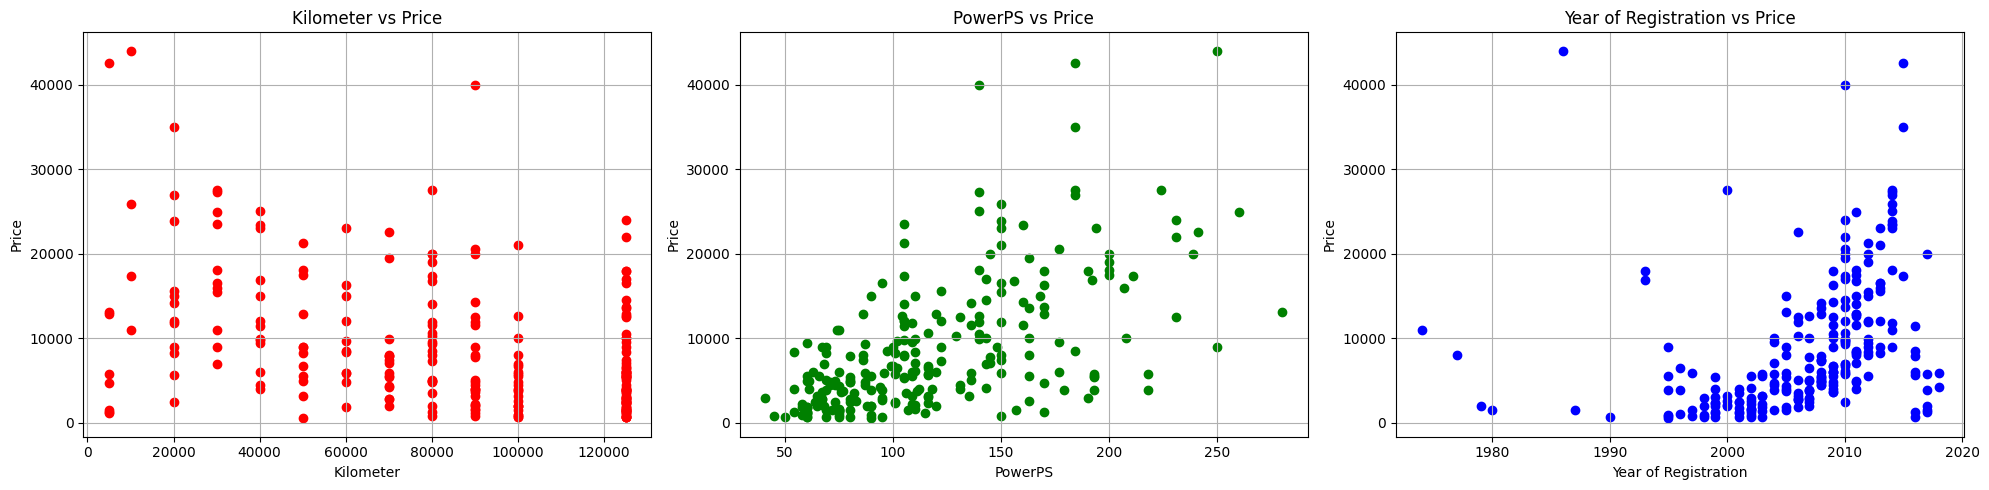

In [80]:
print(f"reihen vor bereinigung: {len(df)}")

# werte werden zu numerisch umgewandelt -> setzt bei Fehlern den wert auf NaN
numeric_columns = ['kilometer', "price", "yearOfRegistration", "powerPS"] #, "fuelType", "name" 
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  

#konvertiert alles zu Strings -> entfernt vorne und hinten leerzeichen ->ersetzt leere zellen mit nan
text_columns = ["fuelType", "model"]
for col in text_columns:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace('', np.nan)

df = df[df['price'] > 300]  #Optionale Bereinigung
df = df.dropna(axis=0)
#df = df.reset_index(drop=True)

print(f"Reihen nach bereinigung: {len(df)}")
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
print(df)

#####Plot zeichnen#####

plt.figure(figsize=(20, 5)) 

y = df["price"]
x = df[["kilometer", "powerPS", "yearOfRegistration"]]

def Plotting(subplot_position,x, y, color, title,x_label):
    plt.subplot(subplot_position)
    plt.scatter(x, y, color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("Price")
    plt.grid(True)


#kilometer/price
Plotting(131, x["kilometer"], y, 'r', "Kilometer vs Price", "Kilometer")

#power/price
Plotting(132, x["powerPS"], y, 'g', "PowerPS vs Price", "PowerPS")

#year of registration/price
Plotting(133, x["yearOfRegistration"], y, 'b', "Year of Registration vs Price", "Year of Registration")


plt.tight_layout()
plt.show()



## hier startet das Projekt!!
### Daten für das Training vorbereiten

In [81]:
#musste nach oben verlegt werden

### Daten in Trainings- und Testdaten aufteilen

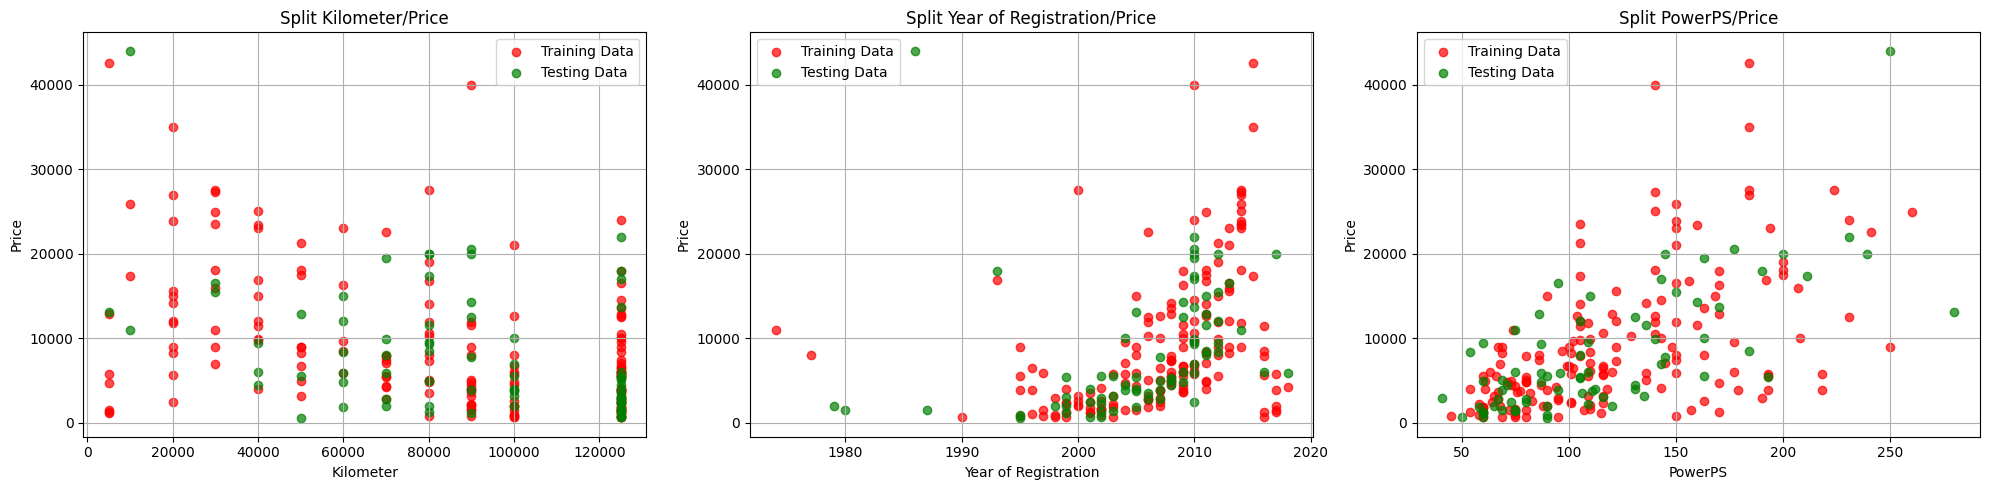

In [82]:

X = df[["kilometer", "yearOfRegistration", "powerPS"]]
y = df["price"]

def Split(X_train, y_train, X_test, y_test, subplot_position, title, xlabel):
    plt.subplot(subplot_position)
    plt.scatter(X_train, y_train, label="Training Data", color='r', alpha=.7)
    plt.scatter(X_test, y_test, label="Testing Data", color='g', alpha=.7)
    plt.legend()
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel("Price")
    plt.title(title)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#####Plot zeichnen######

plt.figure(figsize=(20, 5))  

#kilometer/price
Split(
    X_train["kilometer"], y_train, X_test["kilometer"], y_test,131,"Split Kilometer/Price","Kilometer"
)

#power/price
Split(
    X_train["powerPS"], y_train, X_test["powerPS"], y_test,133,"Split PowerPS/Price","PowerPS"
)

# year/price

Split(
    X_train["yearOfRegistration"], y_train, X_test["yearOfRegistration"], y_test, 132,"Split Year of Registration/Price","Year of Registration"
)

plt.tight_layout()
plt.show()


### Lineare Regression anwenden

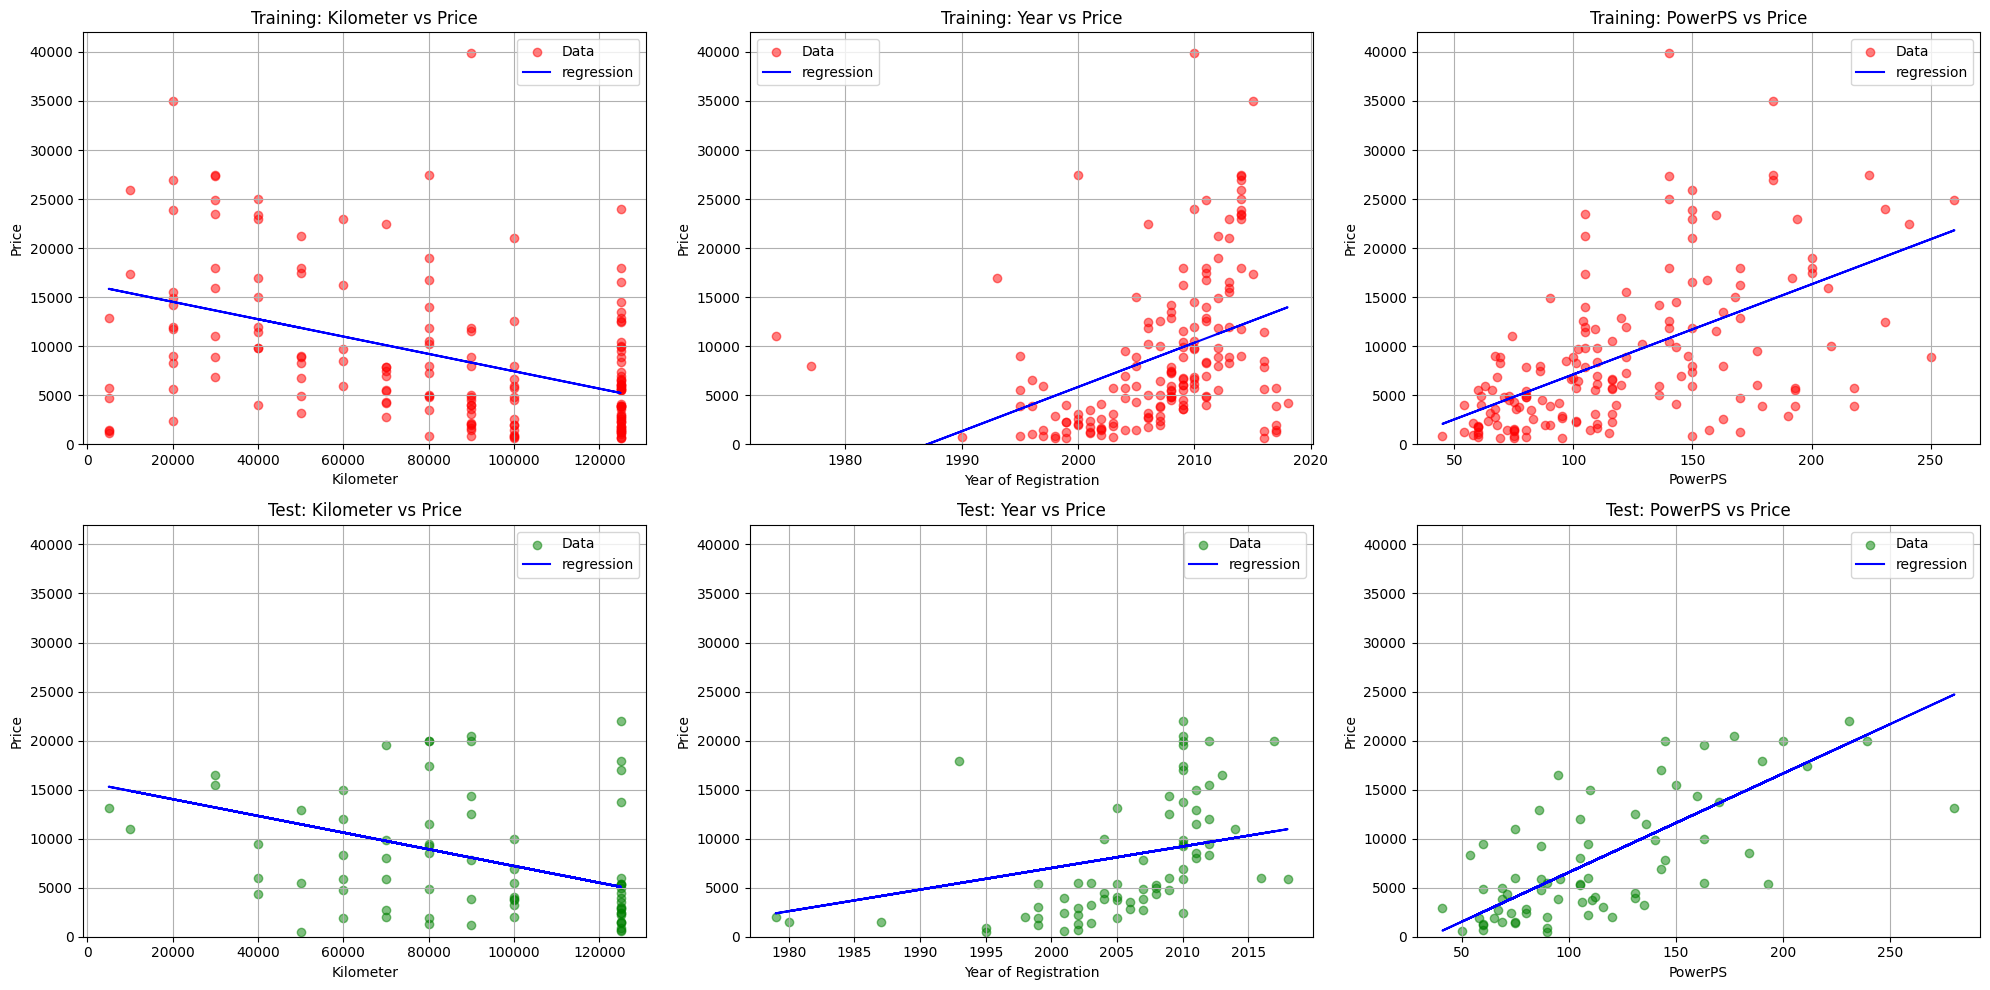

In [83]:
def plot_linear_regression(X, y, xlabel, ylabel, title, subplot_position, color):
    #Zu 2 Dimensionalen Array
    X = np.array(X).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    #nimmt das model und macht voraussagen basierend auf den daten von x
    predictions = model.predict(X)
    plt.subplot(subplot_position)
    plt.scatter(X, y, label="Data", color=color, alpha=0.5)
    #Zeichnet die Linie, welche basierend auf model.predict erschaffen wurde
    plt.plot(X, predictions, label="regression", color='b')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 42000)
    

plt.figure(figsize=(20, 10))

####training data plots####
plot_linear_regression(
    X_train["kilometer"], y_train,"Kilometer", "Price","Training: Kilometer vs Price", 231, 'r'
)

plot_linear_regression(
    X_train["powerPS"], y_train,"PowerPS", "Price", "Training: PowerPS vs Price", 233,'r'
)

plot_linear_regression(
    X_train["yearOfRegistration"], y_train, "Year of Registration","Price","Training: Year vs Price", 232, 'r'
)

####test data plots#####
plot_linear_regression(
    X_test["kilometer"], y_test, "Kilometer", "Price","Test: Kilometer vs Price", 234, 'g'
)

plot_linear_regression(
    X_test["powerPS"], y_test,"PowerPS", "Price","Test: PowerPS vs Price", 236, 'g'
)

plot_linear_regression(
    X_test["yearOfRegistration"], y_test,"Year of Registration", "Price","Test: Year vs Price", 235, 'g'
)

plt.tight_layout()
plt.show()


### Was kosten folgende Autos
- Diesel aus dem Jahr 2008 mit 150PS und 80000km 
- Hybrid aus dem Jahr 2013 mit 220PSund 50000km

Predicted price for Car 1 (Year: 2008, PowerPS: 150, Kilometer: 80000): 12094.40
Predicted price for Car 2 (Year: 2013, PowerPS: 220, Kilometer: 50000): 21542.17


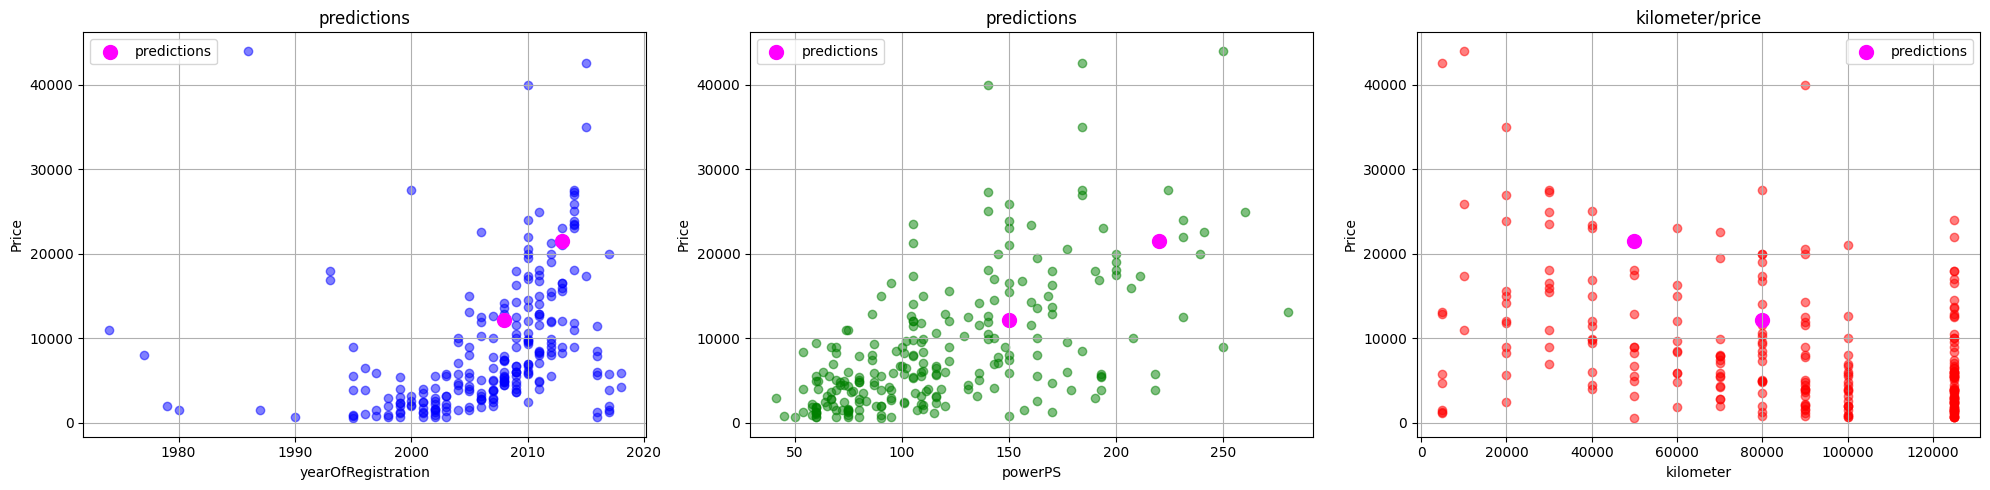

In [84]:
def predict_price( model, kilometer, year, powerPS):
    features = pd.DataFrame([[kilometer, year, powerPS]], 
                            columns=["kilometer", "yearOfRegistration", "powerPS"])
    return model.predict(features)[0]

def plotting(subplot_position, X,y, color, xlabel, ylabel, title):
    plt.subplot(subplot_position)
    plt.scatter(X,y, color=color, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

# trainiert das model mit allen vorhandenen daten
full_model = LinearRegression()
full_model.fit(X, y)

# macht ein Array mit den Daten für die autos
car1 = {"year": 2008, "powerPS": 150, "kilometer": 80000}
car2 = {"year": 2013, "powerPS": 220, "kilometer": 50000}

# ruft die predict_price funktion ab und speichert den wert in die predict price variable
price_car1 = predict_price(full_model, car1["kilometer"], car1["year"], car1["powerPS"])
price_car2 = predict_price(full_model, car2["kilometer"], car2["year"], car2["powerPS"])

print(f"Predicted price for Car 1 (Year: {car1["year"]}, PowerPS: {car1["powerPS"]}, Kilometer: {car1["kilometer"]}): {price_car1:.2f}")
print(f"Predicted price for Car 2 (Year: {car2["year"]}, PowerPS: {car2["powerPS"]}, Kilometer: {car2["kilometer"]}): {price_car2:.2f}")

plt.figure(figsize=(20, 5))

# Plot 1: year/price
plotting(
    131, X["yearOfRegistration"], y, 'b', "yearOfRegistration", "Price", "predictions"
    
)
plt.scatter([car1["year"], car2["year"]], [price_car1, price_car2], color='magenta', s=100, label='predictions')
plt.legend()

# Plot 2: power/price
plotting(
    132, X["powerPS"], y, 'g', "powerPS", "Price", "predictions"  
)
plt.scatter([car1["powerPS"], car2["powerPS"]], [price_car1, price_car2], color="magenta", s=100, label="predictions",)
plt.legend()

# Plot 3: km/price
plotting(
    133, X["kilometer"], y, 'r', "kilometer", "Price", "kilometer/price"
)
plt.scatter([car1["kilometer"], car2["kilometer"]], [price_car1, price_car2], color="magenta", s=100, label="predictions",)
plt.legend()


plt.tight_layout()
plt.show()
